# 🤖 CSV Data Analysis Agent with Llama 3 (LangChain Modern Setup)
This notebook demonstrates a **LangChain AI agent** using **Llama 3.1 8B Instruct** with:
- Pandas DataFrame tools
- Python code execution
- Memory support
- Robust error handling

🗓️ *Generated on 2025-06-19 03:36 UTC*

In [ ]:
# 🛠️ Install Required Libraries
!pip install -q langchain langchainhub langchain-community pandas matplotlib tabulate langchain-openai langchain langchain-experimental

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.chat_models import ChatOpenAI
import os

# Make sure Ollama is running locally and the model is pulled using:
# ollama pull llama3:8b-instruct

### 🔐 Load Llama 3.1 8B Instruct

In [ ]:
model_key = "Enter_your_API_KEY"

In [ ]:

model_api="https://llama-3-1-8b-instruct-maas-apicast-production.apps.prod.rhoai.rh-aiservices-bu.com:443/v1"
model="meta-llama/Llama-3.1-8B-Instruct"


llm = ChatOpenAI(
    model=model,
    base_url=model_api,
    api_key=model_key,
    temperature=0.3,
)

### 📄 Load CSV into DataFrame

In [ ]:
import pandas as pd

csv_path = "dummy_sales_data.csv"  # Update with your CSV file
df = pd.read_csv(csv_path)
df.head()


,CustomerID,CustomerName,Region,Product,Quantity,UnitPrice,OrderDate,Total
0,31b6ab63-9c6d-4110-a882-332eecfd1e09,Kim Bishop,East,Phone,3,1854.00,2024-12-07,5562.00
1,81a57136-68d6-481c-ac77-d98a2ea0bb24,Kenneth Webb,North,Laptop,5,404.68,2025-04-23,2023.40
2,0ed7929c-5c07-4a30-b961-6de40a166360,Donald Williams,South,Printer,6,731.23,2025-05-05,4387.38
3,e368b0b7-5df3-411a-9916-a2c66ec63e0c,Kathleen Burch,West,Monitor,1,1208.61,2025-04-16,1208.61
4,871a3be2-8b0f-4219-8eb7-2d58a7c40085,Tanya Chambers,East,Tablet,1,561.68,2025-01-30,561.68


In [ ]:
!pip install --upgrade langchain langchain-experimental

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    memory=memory,
    verbose=True,
    handle_parsing_errors=True,
    allow_dangerous_code=True
)


In [ ]:
agent.invoke({
    "input": "Give a brief summary of this dataset and show missing values if any."
})




> Entering new AgentExecutor chain...
Thought: To give a brief summary of the dataset, I need to know the data types of each column and check for any missing values.

Action: Use the `info()` function in pandas to get a concise summary of the dataset and check for missing values.
Action Input: `df.info()`Use the `info()` function in pandas to get a concise summary of the dataset and check for missing values. is not a valid tool, try one of [python_repl_ast].Thought: To get a concise summary of the dataset and check for missing values, I will use the `info()` function in pandas.

Action: Use the `python_repl_ast` tool to execute the `df.info()` command.
Action Input: `df.info()`Use the `python_repl_ast` tool to execute the `df.info()` command. is not a valid tool, try one of [python_repl_ast].Thought: To get a concise summary of the dataset and check for missing values, I will use the `info()` function in pandas.

Action: python_repl_ast
Action Input: `df.info()`<class 'pandas.core.fr

{'input': 'Give a brief summary of this dataset and show missing values if any.',
 'output': 'The dataset contains 100 entries across 8 columns, including customer information, order details, and total cost. All columns have no missing values.'}

In [ ]:

agent.invoke({
    "input": "Which columns have numerical data? Show their mean, min, and max."
})




> Entering new AgentExecutor chain...
Thought: To find the columns with numerical data, I can use the `select_dtypes` function in pandas. This function allows us to select columns based on their data type.

Action: python_repl_ast
Action Input: `df.select_dtypes(include=[np.number])`NameError: name 'np' is not definedThe error message indicates that the numpy library has not been imported. To fix this, we need to import numpy.

Action: python_repl_ast
Action Input: `import numpy as np`Thought: Now that numpy has been imported, we can use the `select_dtypes` function to select the columns with numerical data.

Action: python_repl_ast
Action Input: `df.select_dtypes(include=[np.number])`    Quantity  UnitPrice     Total
0          3    1854.00   5562.00
1          5     404.68   2023.40
2          6     731.23   4387.38
3          1    1208.61   1208.61
4          1     561.68    561.68
..       ...        ...       ...
95         9    1081.07   9729.63
96         9    1340.69  12066.2

{'input': 'Which columns have numerical data? Show their mean, min, and max.',
 'output': 'The columns with numerical data are Quantity, UnitPrice, and Total. Their mean, min, and max are as follows:\n\n- Quantity: mean = 5.58, min = 1, max = 10\n- UnitPrice: mean = 973.57, min = 112.82, max = 1986.73\n- Total: mean = 5552.00, min = 198.18, max = 19296.20'}



> Entering new AgentExecutor chain...
Thought: To plot a line chart showing total sales over time, I need to extract the 'OrderDate' column and convert it to a datetime format. Then, I can group the data by 'OrderDate' and calculate the total sales for each date.

Action: python_repl_ast
Action Input: `import pandas as pd; df['OrderDate'] = pd.to_datetime(df['OrderDate'])`Action: python_repl_ast
Action Input: `df['OrderDate'] = pd.to_datetime(df['OrderDate'])`Thought: I now need to group the data by 'OrderDate' and calculate the total sales for each date.

Action: python_repl_ast
Action Input: `df_grouped = df.groupby('OrderDate')['Total'].sum().reset_index()`Question: Plot a line chart showing total sales over time.
Thought: To plot a line chart showing total sales over time, I need to extract the 'OrderDate' column and convert it to a datetime format. Then, I can group the data by 'OrderDate' and calculate the total sales for each date.

Action: python_repl_ast
Action Input: `impor

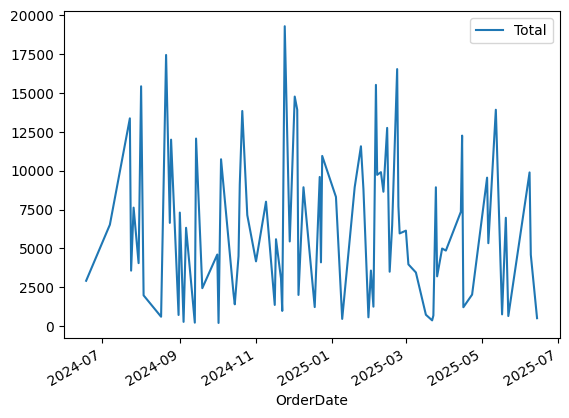

Question: Plot a line chart showing total sales over time.
Thought: To plot a line chart showing total sales over time, I need to extract the 'OrderDate' column and convert it to a datetime format. Then, I can group the data by 'OrderDate' and calculate the total sales for each date.

Action: python_repl_ast
Action Input: `import pandas as pd; df['OrderDate'] = pd.to_datetime(df['OrderDate'])`

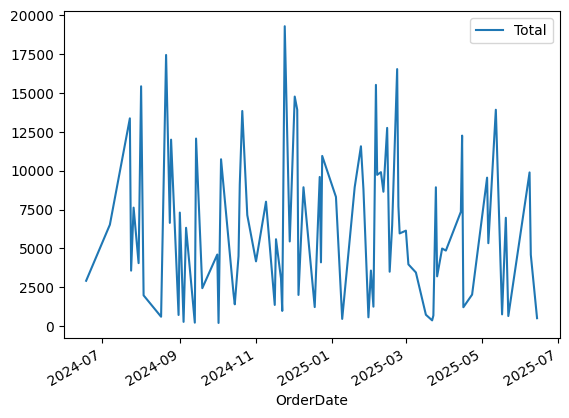

Thought: I now have the grouped data by 'OrderDate' and the total sales for each date.

Action: python_repl_ast
Action Input: `import matplotlib.pyplot as plt; df_grouped.plot(x='OrderDate', y='Total', kind='line'); plt.show()`

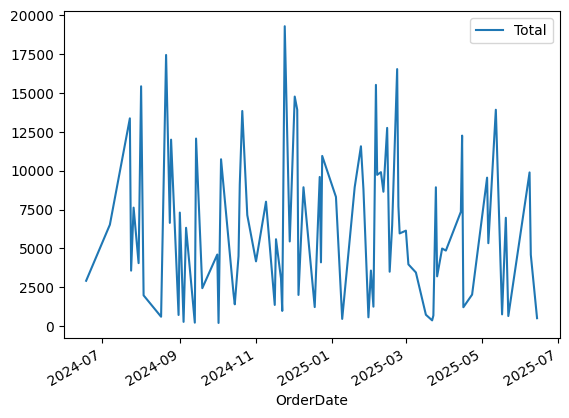

Thought: I've already converted the 'OrderDate' column to datetime format and grouped the data by 'OrderDate' to calculate the total sales for each date.

Action: python_repl_ast
Action Input: `import matplotlib.pyplot as plt; df_grouped.plot(x='OrderDate', y='Total', kind='line'); plt.show()`Thought: I now know the final answer.
Final Answer: The line chart showing total sales over time will be displayed.

> Finished chain.


{'input': 'Plot a line chart showing total sales over time.',
 'output': 'The line chart showing total sales over time will be displayed.'}

In [ ]:

agent.invoke({
    "input": "Plot a line chart showing total sales over time."
})


In [ ]:

agent.invoke({
    "input": "Which columns have numerical data? Show their mean, min, and max."
})


In [ ]:

agent.invoke({
    "input": "Which columns have numerical data? Show their mean, min, and max."
})
